In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
import sklearn

from sklearn.metrics import accuracy_score, mean_squared_error

# 모델 클래스 선택 => 학습기 
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

# 마켓과 머신러닝

## kNN

- k-최근접 이웃 알고리즘
- 새로운 데이터를 입력받았을때 가장 가까이 있는 것은 무엇일까?

<img src='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99631D335A165F182D00A7'>

## 생선 분류 문제

- 출처 : https://www.kaggle.com/aungpyaeap/fish-market

```
1) 데이터 준비 
    도미와 방어의 길이와 무게 
    X, y 
2) 모델 생성 : KNeighborsClassifier
3) 모델 학습 fit()
4) 평가 score()
5) 예측 predict()
```

### 도미 데이터 준비하기

In [4]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [5]:
len(bream_length),len(bream_weight)

(35, 35)

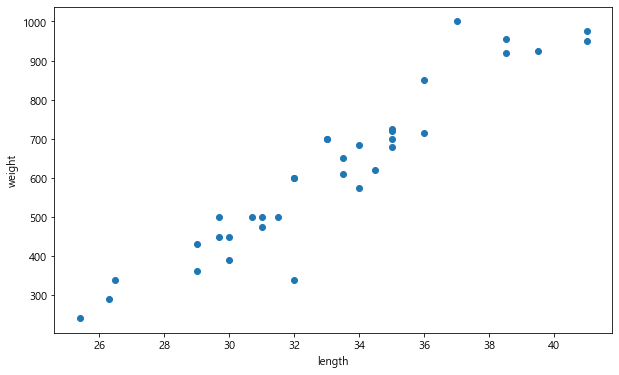

In [8]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 



In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
len(smelt_length),len(smelt_weight)

(14, 14)

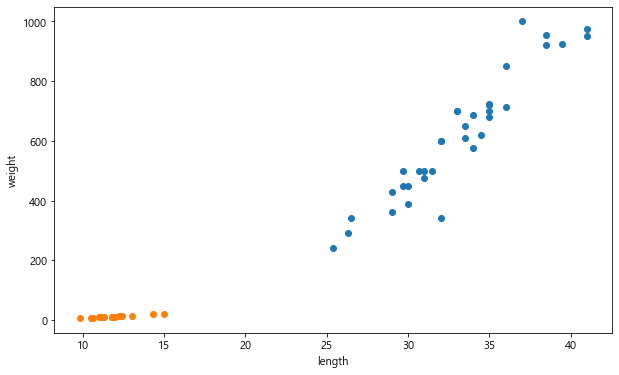

In [10]:
# 파란색 도미 산점도 
plt.scatter(bream_length, bream_weight)
# 오렌지 빙어 산점도 
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
print(length)
print(weight)
print(len(length), len(weight))

# zip() 함수를 이용하여 2차원 리스트로 합치기 
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

# print(fish_data)
print(f' {len(fish_data)} 행 {len(fish_data[0])} 열' )

# 생선(도미, 빙어)의 길이와 무게 
for i, j in fish_data:
    print(i, j)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
49 49
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [

In [25]:
# 넘파이 배열 버전 
arr_length = np.array(bream_length+smelt_length).reshape(-1,1)
arr_weight = np.array(bream_weight+smelt_weight).reshape(-1,1)
print(arr_length.shape, arr_weight.shape)
print(arr_length.ndim, arr_weight.ndim)

# 49, 2 열 
arr_fish = np.hstack((arr_length, arr_weight))
print(arr_fish.shape)
for i, j in arr_fish:
    print(i, j)

(49, 1) (49, 1)
2 2
(49, 2)
25.4 242.0
26.3 290.0
26.5 340.0
29.0 363.0
29.0 430.0
29.7 450.0
29.7 500.0
30.0 390.0
30.0 450.0
30.7 500.0
31.0 475.0
31.0 500.0
31.5 500.0
32.0 340.0
32.0 600.0
32.0 600.0
33.0 700.0
33.0 700.0
33.5 610.0
33.5 650.0
34.0 575.0
34.0 685.0
34.5 620.0
35.0 680.0
35.0 700.0
35.0 725.0
35.0 720.0
36.0 714.0
36.0 850.0
37.0 1000.0
38.5 920.0
38.5 955.0
39.5 925.0
41.0 975.0
41.0 950.0
9.8 6.7
10.5 7.5
10.6 7.0
11.0 9.7
11.2 9.8
11.3 8.7
11.8 10.0
11.8 9.9
12.0 9.8
12.2 12.2
12.4 13.4
13.0 12.2
14.3 19.7
15.0 19.9


In [26]:
# arr_length

In [27]:
# arr_weight 

In [28]:
arr_fish.shape

(49, 2)

In [30]:
# 데이타프레임 버전 
df_fish = pd.DataFrame(columns=['length', 'weight'])

length = bream_length+smelt_length
weight = bream_weight+smelt_weight

df_fish['length']=length
df_fish['weight']=weight

print(df_fish.shape)
df_fish 

(49, 2)


,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [ ]:
y = [1]*35 + [0]*14
print(y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier()

In [ ]:
model_kn.fit(fish_data, y)

In [ ]:
model_kn.score(fish_data, y)

In [ ]:
model_kn.predict([[38.5, 920.0]])

In [ ]:
model_kn.predict([[12.4,13.4]])

In [ ]:

result = accuracy_score(y, model_kn.predict(fish_data))
print(f'정답률은? {result*100} %')

In [ ]:
# 에러률 
result = mean_squared_error(y, y)
print(f'에러률은? {result*100} %')

# k-최근접 이웃 알고리즘

- model_kn._fit_X : 학습데이타 X
- model_kn._y : 정답지, 학습데이타 y

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
model_kn.predict([[30, 600]])

In [ ]:
print(model_kn._fit_X)

In [ ]:
print(model_kn._y)

In [ ]:
KNeighborsClassifier?

##### k-최근접 이웃 알고리즘의 매개변수 하이퍼파라미터를 변경하여 보자 

In [ ]:
model_kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
model_kn49.fit(fish_data, fish_target)
model_kn49.score(fish_data, fish_target)

# Quiz


k-최근접 이웃 알고리즘에서 이웃의 갯수 kn.n_neighbors
파라미터를 5~49까지 변경하여 score() 점수가 1.0 아래로 내려가기 시작하는 이웃의 갯수를 찾아라 